## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Keras

Detailed instructions can be found at https://keras.io.


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

In [ ]:
from google.colab import files
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils

Saving utils.py to utils.py


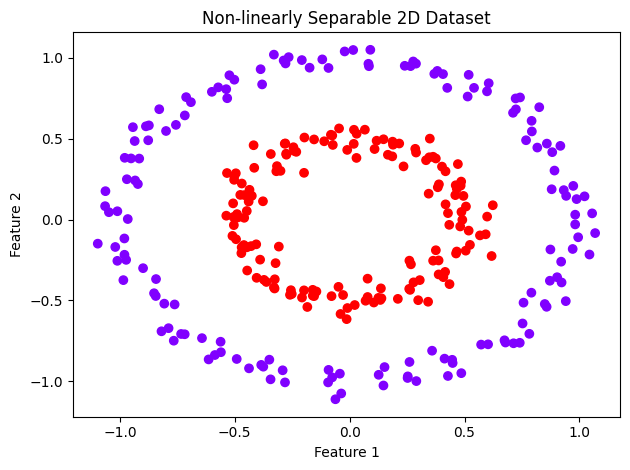

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

# Generate a non-linearly separable dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=42)

# Function to get consistent colors for plotting
def get_colors(y):
    # Map unique labels to colors
    unique_labels = np.unique(y)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    color_map = {label: color for label, color in zip(unique_labels, colors)}
    return [color_map[label] for label in y]

cmap = get_colors(y)

# Plotting
plt.scatter(X[:, 0], X[:, 1], c=cmap)
plt.title("Non-linearly Separable 2D Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()

Let's split it into a training and testing set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit.

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [ ]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [ ]:
### YOUR CODE HERE ###

perceptron = Sequential()

perceptron.add(Dense(units=1, input_dim=X_train.shape[1]))

Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the loss function as "binary_crossentropy".

In [ ]:
# sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
# ValueError: decay is deprecated in the new Keras optimizer, please check the docstring for valid arguments, or use the legacy optimizer, e.g., tf.keras.optimizers.legacy.SGD.

from keras.optimizers import legacy
sgd_legacy = legacy.SGD(learning_rate=0.001, decay=1e-7, momentum=0.9)

perceptron.compile(loss="binary_crossentropy", optimizer=sgd_legacy)


Q2. Now we train the built perceptron with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
perceptron.fit(X_train, y_train, epochs=300, batch_size=16)

Epoch 1/300
15/15 [==============================] - 1s 5ms/step - loss: 1.6377
Epoch 2/300
15/15 [==============================] - 0s 5ms/step - loss: 0.7487
Epoch 3/300
15/15 [==============================] - 0s 8ms/step - loss: 0.7402
Epoch 4/300
15/15 [==============================] - 0s 5ms/step - loss: 0.7086
Epoch 5/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6927
Epoch 6/300
15/15 [==============================] - 0s 4ms/step - loss: 0.6919
Epoch 7/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6921
Epoch 8/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6915
Epoch 9/300
15/15 [==============================] - 0s 7ms/step - loss: 0.6915
Epoch 10/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6916
Epoch 11/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6919
Epoch 12/300
15/15 [==============================] - 0s 5ms/step - loss: 0.6924
Epoch 13/300
15/15 [=================

Q3. Compute accuracy by implementing your own function.

In [ ]:
y_preds = perceptron.predict(X_test)

2/2 [==============================] - 0s 11ms/step


In [ ]:
### Build your own function to calculate accuracy###

def accuracy(y_test, y_preds):
    TP = sum((y_test[i] == 1) and (y_preds[i] == 1) for i in range(len(y_test)))
    FP = sum((y_test[i] == 0) and (y_preds[i] == 1) for i in range(len(y_test)))
    TN = sum((y_test[i] == 0) and (y_preds[i] == 0) for i in range(len(y_test)))
    FN = sum((y_test[i] == 1) and (y_preds[i] == 0) for i in range(len(y_test)))
    if TP+FP+FN+TN == 0:
        return 0
    return((TP+TN)/(TP+FP+FN+TN))

In [ ]:
# Make y_preds into binary data

#from sklearn.metrics import roc_curve, auc
#fpr, tpr, thresholds = roc_curve(y_test, y_preds)
#roc_auc = auc(fpr, tpr)

#threshold_index = np.argmax(tpr - fpr)
#threshold = thresholds[threshold_index]

y_preds_binary = np.where(y_preds > 0.5, 1, 0)

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_preds_binary)}')

The accuracy is: [0.35]


57/57 [==============================] - 0s 4ms/step


Text(22.347222222222214, 0.5, 'Test')

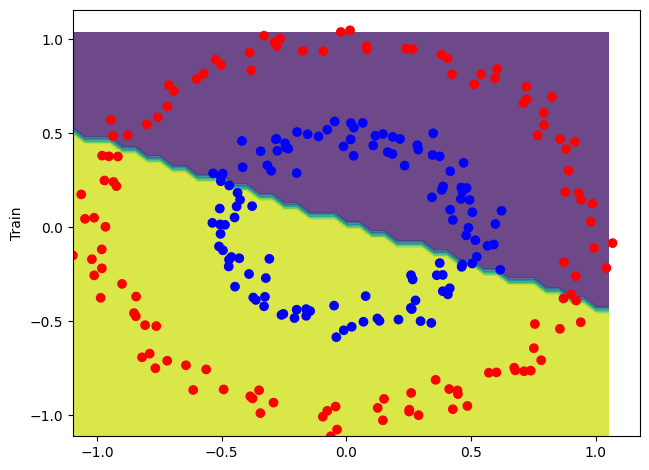

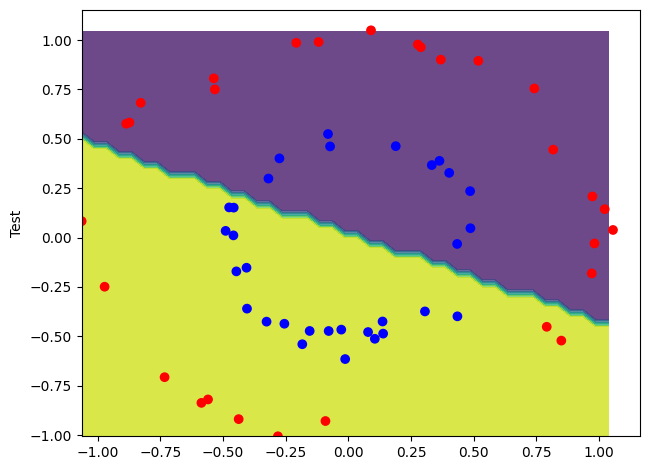

In [ ]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For this exercise, use Keras to create a 2-layer neural network by completing build_one_output_model(). We will then add one hidden layer of 2 units and an output layer of 1 unit (corresponding to our classes- sometimes referred to as a "readout" layer).

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer

from keras.layers import Dense
# SGD is the learning algorithm we will use
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [ ]:
def build_one_output_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with 2 units
    model.add(Dense(units=2, input_dim=X_train.shape[1], activation='relu'))

    # Add a final output layer with 1 unit
    model.add(Dense(units=1, activation='sigmoid'))

    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd_legacy = legacy.SGD(learning_rate=0.001, decay=1e-7, momentum=0.9)

    # compile the model with "binary_crossentropy" loss and SGD optimizer.
    model.compile(loss="binary_crossentropy", optimizer=sgd_legacy)

    return model


In [ ]:
model = build_one_output_model()

Q2. Fit your model by training set with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, epochs=300, batch_size=16)

Epoch 1/300
15/15 [==============================] - 1s 3ms/step - loss: 0.7093
Epoch 2/300
15/15 [==============================] - 0s 4ms/step - loss: 0.7083
Epoch 3/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7071
Epoch 4/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7056
Epoch 5/300
15/15 [==============================] - 0s 4ms/step - loss: 0.7044
Epoch 6/300
15/15 [==============================] - 0s 10ms/step - loss: 0.7032
Epoch 7/300
15/15 [==============================] - 0s 11ms/step - loss: 0.7021
Epoch 8/300
15/15 [==============================] - 0s 3ms/step - loss: 0.7011
Epoch 9/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6999
Epoch 10/300
15/15 [==============================] - 0s 4ms/step - loss: 0.6991
Epoch 11/300
15/15 [==============================] - 0s 4ms/step - loss: 0.6981
Epoch 12/300
15/15 [==============================] - 0s 7ms/step - loss: 0.6972
Epoch 13/300
15/15 [===============

Q3. Compute accuracy by using your own function.

In [ ]:
### YOUR CODE HERE ###

y_preds = model.predict(X_test).reshape(-1)

# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_test, y_preds)
# roc_auc = auc(fpr, tpr)

# threshold_index = np.argmax(tpr - fpr)
# threshold = thresholds[threshold_index]

y_preds_binary = np.where(y_preds > 0.5, 1, 0)

print(f'The accuracy is: {accuracy(y_test, y_preds_binary)}')

2/2 [==============================] - 0s 5ms/step
The accuracy is: 0.7166666666666667


57/57 [==============================] - 0s 2ms/step


Text(22.347222222222214, 0.5, 'Test')

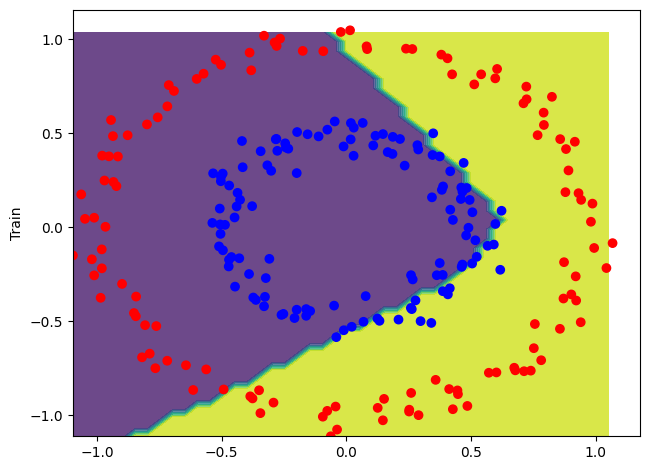

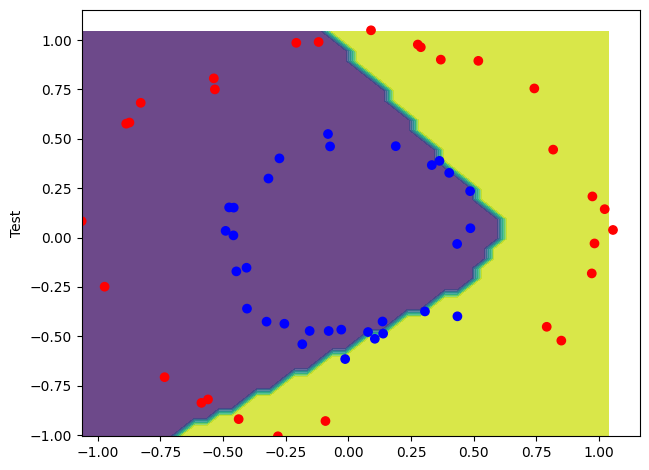

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a classification neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is the number of classes. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding".

In [ ]:
# Before we can fit the network, we need to one-hot vectorize our response.
# There is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)
y_test_vectorized = to_categorical(y_test)

In [ ]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]


The one hot encoded vectors will serve as future labels for our models.

# Exercise 3:

Q1.Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2.


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

We use SGD optimizer and "categorical_crossentropy" loss function to compile the model.

In [ ]:
def build_classification_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a hidden layer with 10 unit
    model.add(Dense(units=10, input_dim=X_train.shape[1], activation='relu'))
    # Add a hidden layer with 5 unit
    model.add(Dense(units=5, activation='relu'))
    # Add a final output layer with 2 unit
    model.add(Dense(units=2, activation='softmax'))

    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd_legacy = legacy.SGD(learning_rate=0.001, decay=1e-7, momentum=0.9)

    # compile the model with "categorical_crossentropy" loss and SGD optimizer.
    model.compile(loss="categorical_crossentropy", optimizer=sgd_legacy)

    return model

In [ ]:
model = build_classification_model()

Q2. Fit your model by training set

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train_vectorized, epochs=300, batch_size=16)

Epoch 1/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6650
Epoch 2/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6604
Epoch 3/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6560
Epoch 4/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6525
Epoch 5/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6500
Epoch 6/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6481
Epoch 7/300
15/15 [==============================] - 0s 3ms/step - loss: 0.6467
Epoch 8/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6449
Epoch 9/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6434
Epoch 10/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6420
Epoch 11/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6407
Epoch 12/300
15/15 [==============================] - 0s 2ms/step - loss: 0.6393
Epoch 13/300
15/15 [=================

Q3. Compute accuracy by using your own function

In [ ]:
y_preds = model.predict(X_test)

y_preds_binary = np.where(y_preds > 0.5, 1, 0)

print(f'The accuracy is: {accuracy(y_test_vectorized[:,0], y_preds_binary[:,0])}')

2/2 [==============================] - 0s 9ms/step
The accuracy is: 1.0


57/57 [==============================] - 0s 2ms/step


Text(22.347222222222214, 0.5, 'Test')

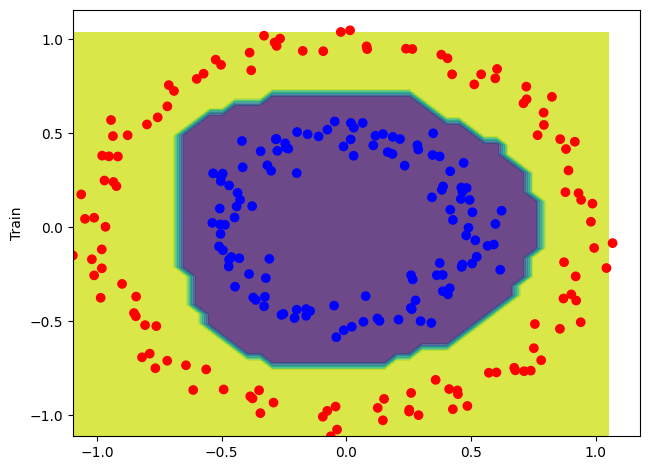

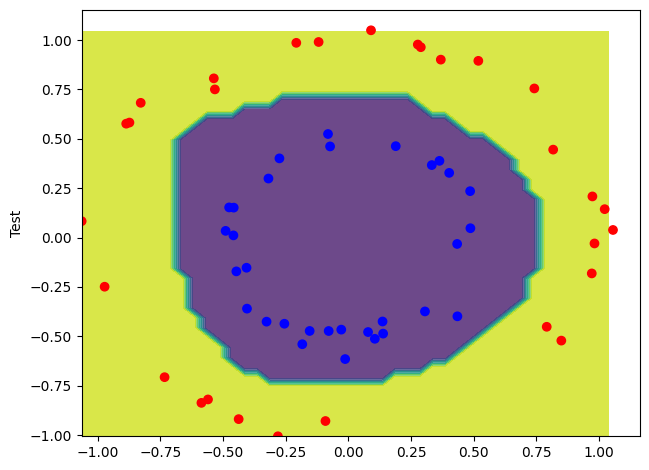

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


# Exercise 4:
### Short answer-questions

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.

Ans-

If the learning rate (step size of descent) is too high in full batch gradient descent, it can cause the model to overshoot the minima or oscillate around it. To avoid this failure of convergence we should choose a size which is small enough to avoid overshooting, but also not so small that it affects model performance.

In case of stochastic gradient descent, the dataset is not processed as a whole in each iteration but rather one data point at a time. So a high learning rate in SGD can lead to Instability and Convergence Issues.
Since each update is based on a single data point, the algorithm may exhibit high variance in the updates, causing the optimization process to be erratic.
This can sometimes lead to the algorithm overshooting and oscillation as well.

In the full batch setting, the entire dataset is considered in each iteration, and updates are made based on the average gradient over all data points. This smoothing effect can reduce the impact of a high learning rate to some extent. The presence of the entire dataset in the update helps in obtaining a more stable and averaged gradient direction, making it less likely to oscillate or diverge compared to the case of SGD.

Full batch setting will also give us the more accurate results as it is always comparing the full dataset. It also tends to have lesser variations in steps

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Data augmentation is used in image classification to increase the size of the training dataset by applying various transformations to the original images.
Some examples of these transformation are rotations, flips and zooms.

Based on this we can see that augmentations like flipping might work well for dogs and cats but not for digits as digits have an inherent symmetry. For numbers like 1,0,8, flipping may not create a lot of difference. Additionally, some digits like 5 and 7 would not hold relevance after flipping as they would not occur in test datasets like that.

Q3. Suppose we have the following two neural networks containing fully-connected layers only.
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A.

Ans-

Network A is better than B as it is a simpler model. This would avoid any potential overfitting and be less computationally demanding. This would allow for better performance and low chances of overfitting

Network A is better than B as the additional layer would allow the model to be more flexible. It would also let the NN identify the features more easily. This can lead to better results for a complex dataset which cannot be classified with a simple classification.

# Exercise 5:

Now let's revisit the classification problem (Dataset 1) in Homework 2. Build a neural network to predict the output in the default payment dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

"CreditDefault_training.csv" has 3985 records.

"CreditDefault_Xtest.csv" contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

Q1. Read the data<br/>
- Apply standardization to continuous values<br/>
- Convert categorical variables and the target "default.payment.next.month" into one-hot encodings. <br>
- Split data into train and validation set<br/>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
### YOUR CODE HERE ###
from google.colab import files
import io

# load CreditDefault_training.csv
uploaded = files.upload()
df_train = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training.csv']))
df_train.head()

Saving CreditDefault_training.csv to CreditDefault_training.csv


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,50000,2,2,2,24,-1,-1,-1,-1,0,...,6561,5091,353,1572,1572,6561,102,353,27000,0
1,70000,2,2,2,24,0,0,0,0,0,...,64733,66680,71243,3000,3000,2500,3000,5800,0,0
2,420000,1,1,1,43,-2,-2,-2,-2,-2,...,2846,3027,5946,14274,8232,2853,3027,5946,32053,0
3,30000,1,2,3,53,1,-2,-1,2,0,...,3825,3825,0,0,4070,0,0,0,0,1
4,50000,2,2,1,49,1,2,2,2,0,...,21951,22287,22778,1000,3321,0,1000,1000,1001,0


In [ ]:
# load CreditDefault_Xtest.csv
uploaded = files.upload()
df_test = pd.read_csv(io.BytesIO(uploaded['CreditDefault_Xtest.csv']))
df_test.head()

Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,80000,1,6,1,41,0,0,0,0,0,...,133017,19164,3272,11766,4351,3520,1000,3272,11766,1740
1,50000,1,1,2,35,0,0,0,0,0,...,18188,18397,18161,18383,1565,7240,795,1000,673,647
2,80000,2,1,1,42,2,2,2,2,2,...,20471,20638,21003,20529,1600,1700,800,1000,0,2000
3,160000,2,2,2,27,0,0,0,0,0,...,80240,39835,41150,0,3600,3700,1700,2000,0,0
4,30000,1,1,1,30,0,0,0,0,0,...,14634,16378,16961,19669,3000,2000,2000,1000,3000,1000


In [ ]:
# Split data into X (features) and y (target)
# Please make sure y is in a one-hot representation

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

X_train = df_train.drop('default.payment.next.month', axis=1)  # Features (exclude the target column)
y_train = df_train[['default.payment.next.month']]

categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Standardization for Training
scaler = StandardScaler()
train_numerical_data = df_train.drop(columns=categorical_columns+['default.payment.next.month'])
numerical_scaled_train = scaler.fit_transform(train_numerical_data)
numerical_scaled_df_train = pd.DataFrame(numerical_scaled_train, columns=train_numerical_data.columns)
print(numerical_scaled_df_train.head())

# One-hot Encoding for Training
encoder = OneHotEncoder()
encoded_columns_train = encoder.fit_transform(df_train[categorical_columns])

feature_names = encoder.get_feature_names_out(categorical_columns) # Get the feature names
encoded_df_train = pd.DataFrame(encoded_columns_train.toarray(), columns=feature_names)
final_df_train = pd.concat([numerical_scaled_df_train, encoded_df_train], axis=1) # Concatenate numerical and one-hot encoded dataframes
final_df_train.head()

   LIMIT_BAL       AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  -0.902690 -1.237370  -0.659401  -0.657623  -0.653395  -0.558590  -0.564919   
1  -0.751263 -1.237370   0.123571   0.174192   0.222944   0.299113   0.397532   
2   1.898720  0.816144  -0.573530  -0.484216  -0.572498  -0.613365  -0.597173   
3  -1.054118  1.896941  -0.680080  -0.679090  -0.618263  -0.598931  -0.584702   
4  -0.902690  1.464622  -0.427412  -0.411319  -0.357541  -0.331676  -0.296197   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
0  -0.630095 -0.264370 -0.244519  0.071315 -0.262679 -0.267721  1.270320  
1   0.500862 -0.175510 -0.171175 -0.178872 -0.109918  0.049149 -0.300705  
2  -0.540866  0.526037  0.097548 -0.157124 -0.108494  0.057642  1.564334  
3  -0.635727 -0.362190 -0.116218 -0.332890 -0.268056 -0.288256 -0.300705  
4  -0.272334 -0.299963 -0.154688 -0.332890 -0.215343 -0.230083 -0.242460  


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
0,-0.902690,-1.237370,-0.659401,-0.657623,-0.653395,-0.558590,-0.564919,-0.630095,-0.264370,-0.244519,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.751263,-1.237370,0.123571,0.174192,0.222944,0.299113,0.397532,0.500862,-0.175510,-0.171175,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.898720,0.816144,-0.573530,-0.484216,-0.572498,-0.613365,-0.597173,-0.540866,0.526037,0.097548,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.054118,1.896941,-0.680080,-0.679090,-0.618263,-0.598931,-0.584702,-0.635727,-0.362190,-0.116218,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.902690,1.464622,-0.427412,-0.411319,-0.357541,-0.331676,-0.296197,-0.272334,-0.299963,-0.154688,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split data into training and validation set (the code has been provided)
from sklearn.model_selection import train_test_split
X_train = final_df_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
# Print out the shape of X_train
print(f'The shape of X_train: {X_train.shape}')
print(X_val.shape, y_train.shape, y_val.shape)

The shape of X_train: (2789, 82)
(1196, 82) (2789, 1) (1196, 1)


Q2. Build a neural network to predict the output in the "CreditDefault_training.csv". The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different number of layers, different number of units in layers and experiment with hyperparameters.

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please use 'relu' activation function for all intermediate layers.

Please build your model in the build_final_model() function

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import SGD as SGD

In [ ]:
def build_final_model():
    model = Sequential()
    ### YOUR CODE HERE ###

    # First add fully-connected (Dense) hidden layers with appropriate input dimension
    model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))

    # Drop out layer
    model.add(Dropout(0.5))

    model.add(Dense(units=32, activation='relu'))
    model.add(Dropout(0.3))

    # Finally, add a readout layer
    model.add(Dense(units=1, activation='sigmoid'))

    ######################
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=["accuracy"])

    return model

In [ ]:
model = build_final_model()

Q3. Fit the model by training set with epochs=100, batch_size=32

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, batch_size = 32, epochs= 100)

Epoch 1/100
88/88 [==============================] - 2s 6ms/step - loss: 0.7287 - accuracy: 0.5203
Epoch 2/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5671 - accuracy: 0.7508
Epoch 3/100
88/88 [==============================] - 1s 9ms/step - loss: 0.5467 - accuracy: 0.7630
Epoch 4/100
88/88 [==============================] - 0s 3ms/step - loss: 0.5428 - accuracy: 0.7684
Epoch 5/100
88/88 [==============================] - 1s 7ms/step - loss: 0.5371 - accuracy: 0.7687
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5208 - accuracy: 0.7712
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7712
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.7702
Epoch 9/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5170 - accuracy: 0.7695
Epoch 10/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5069 - accuracy: 0.7770
Epoch 11/

Q4. Obtain predictions on validation set and print accuracy, precision & recall and F1 score.

F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
y_pred = model.predict(X_val)
print(y_pred)

38/38 [==============================] - 0s 2ms/step
[[0.23678562]
 [0.08433041]
 [0.6378036 ]
 ...
 [0.19455676]
 [0.22645986]
 [0.12329843]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

# Calculate Accuracy
accuracy = accuracy_score(y_val, y_pred_classes)

# Calculate Precision
precision = precision_score(y_val, y_pred_classes)

# Calculate Recall
recall = recall_score(y_val, y_pred_classes)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

F1 = 2*(precision * recall) / (precision + recall)
print("F1:", F1)

Accuracy: 0.818561872909699
Precision: 0.6645962732919255
Recall: 0.3962962962962963
F1: 0.49651972157772617


Q5. Plot the ROC curve by giving appropriate names for title and axes.

38/38 [==============================] - 0s 2ms/step


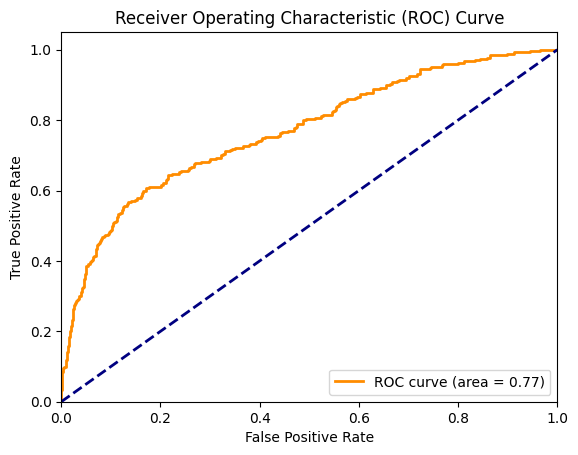

0.7688824894008479


In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes.
### WRITE CODE HERE
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

y_val_probs = model.predict(X_val).ravel()
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(roc_auc)

Is the accuracy value impressive for this dataset? Please explain based on the structure of this dataset.

For these five metrics (accuracy, precision, recall, F1 score and AUC), please explain their connections and differences. For our dataset, which metrics should we focus more on?

Ans - Although an accuracy value of roughly 0.8068 (80.68%) may seem impressive at first glance, our dataset is imbalanced, meaning that the high accuracy value may be due to predicting the majority of the class. In other words, with our imbalanced dataset, an accuracy value of 80.68% alone is not sufficient to determine if it is impressive. However, other metrics such as precision, recall, F1 score, and AUC could help provide a more holistic view of the model's performance along with accuracy.<br><br>

$$ \text{Accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}} $$ <br>
$$ \text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Positives (FP)}} $$ <br>
$$ \text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP) + False Negatives (FN)}} $$ <br>

Accuracy presents an overall view of the model's correctness. However, it treats all errors equally (false positives and false negative are treated the same). Precision measures the accuracy of the positive predictions. Recall measures the ability of the model to identify all relevant instances. Achieving a model with high precision often comes at the expense of high recall, as there is typically a trade-off between these two metrics. Based on the situation, the priority of precision or recall may be different. In situations such as fraud detection or medical diagnoses, it may be better to prioritize recall. However, in precision machinery manufacturing, we may want to prioritize precision. F1 score balances precision and recall by considering both false positives and false negatives. AUC assesses the model's ability to discriminate between classes across various thresholds.

For this dataset, we should focus more on Recall because missing a prediction of default is costly. Higher recall models indicate that the model is effective in capturing defaults.


#### Tuning hyperparameters using cross-validation:<br/>
Cross-validation in neural networks is computationally expensive. So we will perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function.

Here, we will use KerasClassifier class, which act as a wrapper of scikit-learn’s library in Keras comes as a handy tool for automating the tuning process.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import RandomizedSearchCV

Q6. First we create a function to build neural network model with activation function and learning rate of SGD as parameters

In [ ]:
# Build create_model function with activation function and learning rate of SGD as parameters
def create_model(learning_rate, activation):

    # Create an SGD optimizer with its learning rate equal to the "learning_rate" parameter value of create_model
    opt = SGD(learning_rate=learning_rate , momentum=.9)

    # Create your neural network model
    model = Sequential()
    # Please keep the same architecture as the NN model you have built above in order for comparison
    # Please use the activation given by the "activation" parameter value of create_model for all inner layers except for the final layer.
    # For the final output layer, choose an appropriate activation function by yourself.

    ### WRITE CODE HERE
    model.add(Dense(64, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics=["accuracy"])
    return model

Create a model object using KerasClassifier from keras.wrappers.scikit_learn by passing the create_model function.

In [ ]:
!pip install scikeras

  Using cached scikeras-0.12.0-py3-none-any.whl (27 kB)


In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
model = KerasClassifier(build_fn = create_model,
                       verbose = 0)

Q7. Try the following hyperparameters:

- activation function: relu, tanh

- batch size: 16, 32 and 64

- epochs: 100, 200 and 500

- learning rate: 0.01, 0.001 and 0.0001

Use dictionary object to define the parameter search space.

In [ ]:
### WRITE CODE HERE
# Define the hyperparameter search space
param_search_space = {
    'model__activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'epochs': [100, 200, 500],
    'model__learning_rate': [0.01, 0.001, 0.0001]
}

print("Parameter Search Space: ", param_search_space)

Parameter Search Space:  {'model__activation': ['relu', 'tanh'], 'batch_size': [16, 32, 64], 'epochs': [100, 200, 500], 'model__learning_rate': [0.01, 0.001, 0.0001]}


Next we perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. We select the randomized search as it works faster than a grid search. Here, we will perform a 5-fold cross-validation search.

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV for the use of RandomizedSearchCV.

In [ ]:
### WRITE CODE HERE
random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions = param_search_space,
                                   cv = 5,
                                   n_iter=10,
                                   n_jobs=-1,
                                   verbose=2,
                                   scoring='accuracy',
                                   error_score='raise')

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train)

In [ ]:
random_search_results = random_search.fit(X_train, y_train_encoded) # it may take several hours.

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Q8. Print the best model parameters

In [ ]:
### WRITE CODE HERE
print("Best Parameters: ", random_search_results.best_params_)

Best Parameters:  {'model__learning_rate': 0.0001, 'model__activation': 'tanh', 'epochs': 500, 'batch_size': 64}


Q9. Fit the model with the Best Parameter Set

In [ ]:
### WRITE CODE HERE
best_model = KerasClassifier(
    model = lambda: create_model(learning_rate=0.001, activation='relu'),
    epochs=100,
    batch_size=32,
    verbose = 0)
best_model.fit(X_train, y_train_encoded)
print(best_model.model_.history.history)

{'loss': [0.6137508749961853, 0.5290291905403137, 0.5107288956642151, 0.4960561990737915, 0.483410120010376, 0.47336122393608093, 0.4641096591949463, 0.4563424289226532, 0.45029711723327637, 0.44531047344207764, 0.44114118814468384, 0.43833813071250916, 0.4357450008392334, 0.4338935613632202, 0.432082861661911, 0.4304240345954895, 0.42895445227622986, 0.42768973112106323, 0.42653384804725647, 0.4258996844291687, 0.4245559871196747, 0.4250873327255249, 0.4229705333709717, 0.4223219156265259, 0.4208504557609558, 0.42044293880462646, 0.4194561243057251, 0.4183540344238281, 0.4178902804851532, 0.41716471314430237, 0.4167572259902954, 0.41545429825782776, 0.4145408570766449, 0.41461431980133057, 0.41401877999305725, 0.4133259057998657, 0.41198042035102844, 0.41223427653312683, 0.41193562746047974, 0.4111749231815338, 0.410585880279541, 0.4097287952899933, 0.40986791253089905, 0.40860965847969055, 0.4082997739315033, 0.4076283574104309, 0.4071349501609802, 0.408012330532074, 0.40620881319046

Q10. Obtain predictions on validation set and print accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE
y_pred = best_model.predict(X_val)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_labels = y_pred.argmax(axis=1)

accuracy = accuracy_score(y_val, y_pred_labels)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_val, y_pred_labels, average='binary')
print(f"Precision: {precision}")

recall = recall_score(y_val, y_pred_labels, average='binary')
print(f"Recall: {recall}")

f1 = f1_score(y_val, y_pred_labels, average='binary')
print(f"F1 Score: {f1}")

Accuracy: 0.8110367892976589
Precision: 0.6018518518518519
Recall: 0.48148148148148145
F1 Score: 0.5349794238683128


Do you get a better accuracy/recall/precision/F1 score than the first NN model you have built in exercise 5? Explain.

Ans- <br>
In the current model, the neural network model showed a slight decrease in accuracy and a noticeable drop in precision compared to Exercise 5, indicating it made more false positive errors. However, this was balanced by a significant improvement in recall, meaning the model was more effective at identifying true positives. The F1 Score, which combines precision and recall, was also higher in our current model, suggesting a better overall balance between identifying true positives and minimizing false positives. This shift indicates that while the current model may have sacrificed some overall accuracy and precision, it gained in its ability to correctly identify positive cases.

### Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same default payment dataset to produce Logistic Regression and Random Forest models.

Q11. Implement a function logistic_regression_model that returns a logistic regression model with the best paprameters. You will use GridSearchCV to find the best parameters. The parameters search space is up to you. If there is any ConvergenceWarning, increase the number of iterations.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def logistic_regression_model(X_train, y_train):
    # Define the model
    logistic_model = LogisticRegression()

    # Define the parameter grid
    param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
        'penalty': ['l1', 'l2'],       # Types of regularization
        'solver': ['liblinear']        # Solver capable of handling l1 penalty
    }

    # Configure GridSearchCV
    grid_search = GridSearchCV(logistic_model, param_grid, cv=5, verbose=1, scoring='accuracy')

    # Fit the model to find the best parameters
    grid_search.fit(X_train, y_train)

    # Return the best model
    return grid_search.best_estimator_

Q12. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
# fit the model
# compute accuracy,precision,recall on validation set
### YOUR CODE HERE ###

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit the model
best_logistic_model = logistic_regression_model(X_train, y_train.values.ravel())
best_logistic_model.fit(X_train, y_train.values.ravel())

# Make predictions on the validation set
y_pred = best_logistic_model.predict(X_val)

# Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print the scores
print(f'Accuracy: {accuracy:}')
print(f'Precision: {precision:}')
print(f'Recall: {recall:}')
print(f'F1 Score: {f1:}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy: 0.8235785953177257
Precision: 0.6685714285714286
Recall: 0.43333333333333335
F1 Score: 0.5258426966292136


Q13. Plot the ROC curve by giving appropriate names for title and axes.

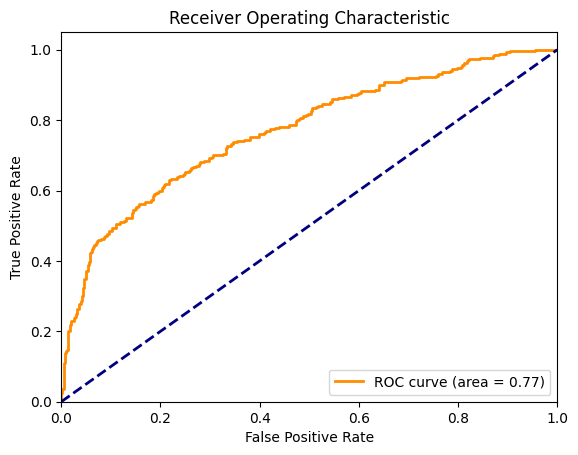

In [ ]:
### WRITE CODE HERE

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob = best_logistic_model.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Q14. Implement a function random_forest_model that returns a random forest model with the best paprameters. You will apply GridSearchCV to find the best parameters. The parameter search space is up to you. (Please set the random state of RandomForestClassifier to be 26.)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def random_forest_model(X_train, y_train):

    rf = RandomForestClassifier(random_state=26)

    # Define the parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],  # Number of trees in the forest
        'max_depth': [None, 10, 20],     # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required to be at a leaf node
    }

    # Configure GridSearchCV
    grid_search = GridSearchCV(rf, param_grid, cv=5, verbose=1, scoring='accuracy')

    # Fit the model to find the best parameters
    grid_search.fit(X_train, y_train)

    # Return the best model
    return grid_search.best_estimator_

# Example usage:
# best_rf_model = random_forest_model(X_train, y_train)

Q15. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit the model
best_rf_model = random_forest_model(X_train, y_train.values.ravel())
best_rf_model.fit(X_train, y_train.values.ravel())

# Make predictions on the validation set
y_pred_rf = best_rf_model.predict(X_val)

# Compute accuracy, precision, recall, and F1 score
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)

# Print the scores
print(f'Accuracy: {accuracy_rf:}')
print(f'Precision: {precision_rf:}')
print(f'Recall: {recall_rf:}')
print(f'F1 Score: {f1_rf:}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Accuracy: 0.8135451505016722
Precision: 0.6270270270270271
Recall: 0.42962962962962964
F1 Score: 0.5098901098901099


Q16. Plot the ROC curve by giving appropriate names for title and axes.

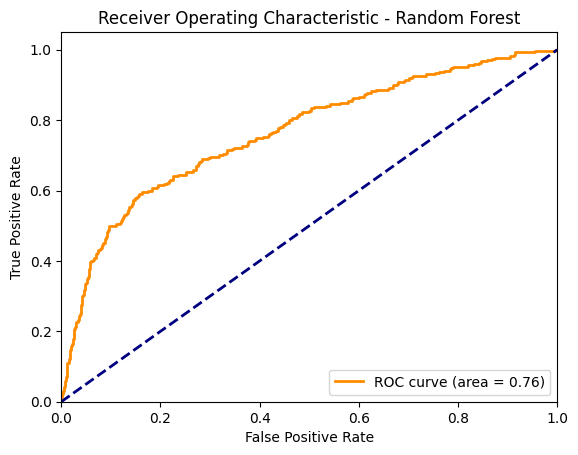

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_pred_prob_rf = best_rf_model.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()

Q17: Which of the above 3 models (NN, Logistic function and random forest) worked best for you? Explain in details the reason for good/bad performance for each of the models?

ANS: The Neural Network (NN) model after cross-validation emerged as the most effective among the three models we tested. Our decision to prioritize the NN model was based on a comprehensive evaluation of several metrics: accuracy, precision, recall, and F1 score. We focused primarily on the recall value for our final decision. The rationale behind this is that recall (the proportion of actual positive loans correctly identified by the model) is most important for banks or other financial institutions' interests. They are particularly concerned about accurately identifying viable loan candidates. The NN model demonstrated superior performance with the highest recall value of 0.481, making it the most suitable choice for our purposes.


Using the best of the above 3 models, obtain predictions for the test set.

In [ ]:
### YOUR CODE HERE ###

y_pred = best_model.predict(X_val).flatten()
y_pred

array([1, 0, 1, ..., 0, 1, 0])



---



### Individual student contribution

Student 1 Joy Lin - Exercise 1 & 2  </br>
Student 2 Dhruv Choudhari - Exercise 3 & 4 </br>
Student 3 Ariel Lee - Exercise 5 </br>
Student 4 Sophie Shu - Tuning hyperparameters using cross-validation </br>
Student 5 Jack Ma - Logistic Regression and Random Forest